<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/PandasTask_Predicting_No_shows_at_medical_appointments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
show = pd.read_table('https://raw.githubusercontent.com/nunnarilabs/ml/master/noshowappointments.csv')

In [8]:
show.head()

,"PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show"
0,"29872499824296,5642903,F,2016-04-29T18:38:08Z,..."
1,"558997776694438,5642503,M,2016-04-29T16:08:27Z..."
2,"4262962299951,5642549,F,2016-04-29T16:19:04Z,2..."
3,"867951213174,5642828,F,2016-04-29T17:29:31Z,20..."
4,"8841186448183,5642494,F,2016-04-29T16:07:23Z,2..."


In [9]:
show = pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/noshowappointments.csv')

In [10]:
show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
# change columns name

new_col_name = ['patient_id', 'appointment_id','gender','schedule_day','appointment_day','age','neighborhood',
               'scholarship','hypertension','diabetes','alcoholism','handicap',
               'sms_received','no_show']
show.columns = new_col_name

In [13]:
show.head(3)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


 2) Is there any age difference in having a patient to be with status Show / No-Show? 


In [14]:
# create mask
showed_up = show['no_show'] == 'No'
not_showed_up = show['no_show'] == 'Yes'

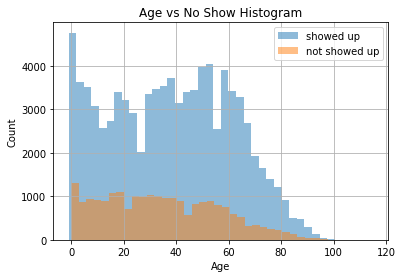

In [15]:
show.age[showed_up].hist(label = 'showed up', alpha = 0.5, bins = 40)
show.age[not_showed_up].hist(label = 'not showed up', alpha = 0.5, bins = 40)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs No Show Histogram')
plt.legend();

In [16]:
# in no_show column No means patient showed up and yes means patient did not showed up
replacement = {'No': 'Showed up',
                 'Yes': 'not showed up'}
show['no_show'].replace(replacement, inplace = True)             

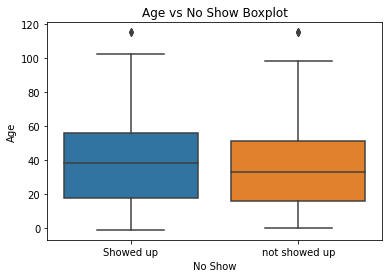

In [17]:
sns.boxplot(x='no_show', y = 'age', data=show);
plt.title('Age vs No Show Boxplot')
plt.xlabel('No Show')
plt.ylabel('Age');

In [18]:
show.groupby('no_show')['age'].mean()

no_show
Showed up        37.790064
not showed up    34.317667
Name: age, dtype: float64

In [19]:
age_noshow = pd.crosstab(index = show['age'],
                         columns = show['no_show'], normalize = 'index')
age_noshow.head()

no_show,Showed up,not showed up
age,,
-1,1.000000,0.000000
0,0.819441,0.180559
1,0.817422,0.182578
2,0.844252,0.155748
3,0.816920,0.183080


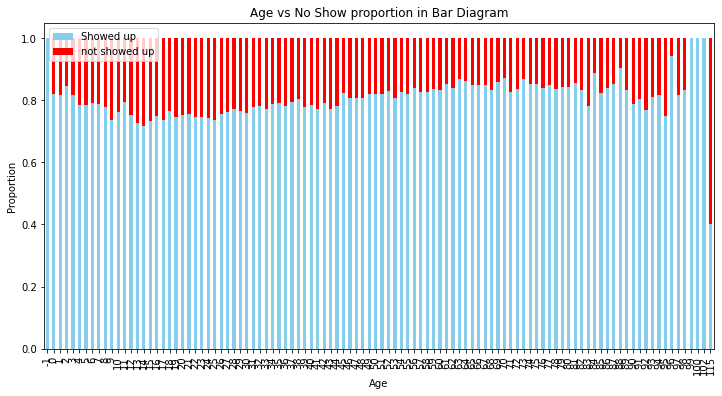

In [20]:
age_noshow.plot(kind = 'bar', stacked = True, figsize=(12,6), color = ['skyblue', 'red'], rot = 90);
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Age vs No Show proportion in Bar Diagram')
plt.legend();

Is there any Gender difference in having a patient to be with status Show / No- Show?

In [21]:
replacement_gender = { 'F': 'Female', 'M': 'Male'}
show['gender'].replace(replacement_gender, inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender Bar Diagram')

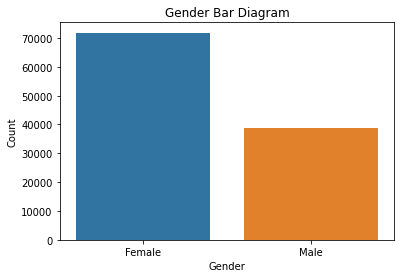

In [22]:
sns.countplot(show['gender']);
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Bar Diagram')

In [23]:
gender_noshow = pd.crosstab(index=show["gender"], columns=show["no_show"])
gender_noshow

no_show,Showed up,not showed up
gender,,
Female,57246,14594
Male,30962,7725


There are more female patient than male patient in dataset 

In [24]:
show.no_show.value_counts()

Showed up        88208
not showed up    22319
Name: no_show, dtype: int64

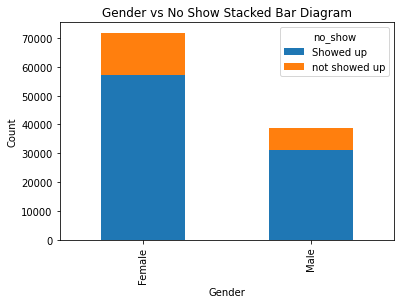

In [25]:
gender_noshow.plot(kind='bar',stacked = True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs No Show Stacked Bar Diagram');

In [26]:
pd.crosstab(index=show["gender"], 
            columns=show["no_show"], normalize = 'index')

no_show,Showed up,not showed up
gender,,
Female,0.796854,0.203146
Male,0.800321,0.199679


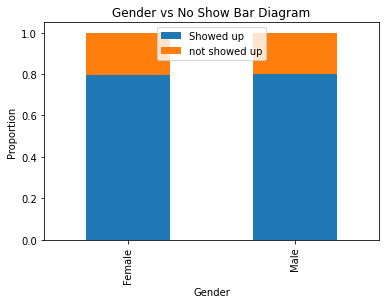

In [27]:
# plot of proportion data
pd.crosstab(index=show["gender"], columns=show["no_show"], normalize = 'index').plot(kind='bar', stacked = True);
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Gender vs No Show Bar Diagram')
plt.legend(loc = 9);

4. On which weekday/day/month maximum appointments are getting finalized with Show status?


In [28]:
# make new column
show['day'] = show.appointment_day.dt.weekday_name

AttributeError: ignored

In [84]:
show['day'].value_counts().plot(kind = 'bar');
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Number of Appointment')

KeyError: ignored

5. Is there any specific medical condition that is driving the patient(Male/Female) to go to for the doctor appointment?


6. Are the digital /social media reminders are helping the patients to take doctor's appointment?

7. 7. Is Scholarship from the government helping patients for good turnaround for physician visits?

In [29]:
column_plot = ['scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received']

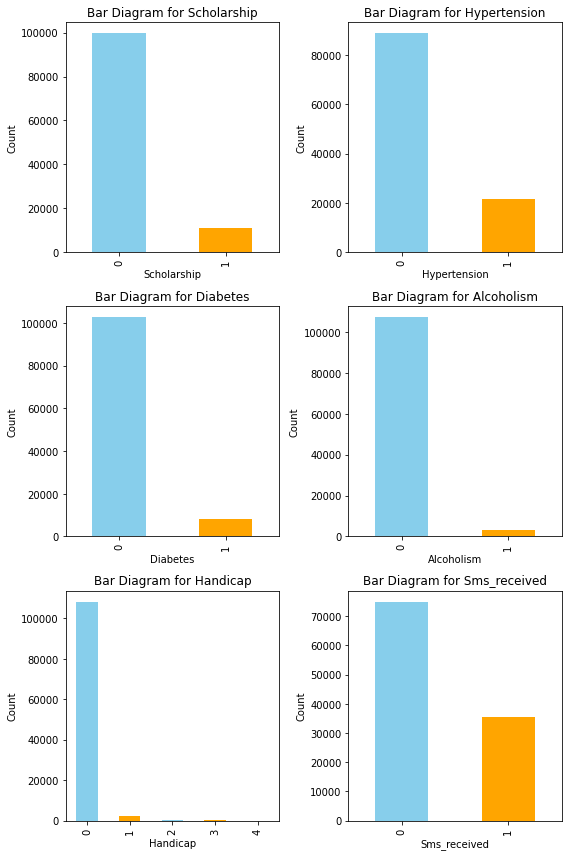

In [30]:
fig = plt.figure(figsize= (8,12))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(3,2, number+1)
    axes.set_xlabel(column.capitalize())
    axes.set_title('Bar Diagram for ' + column.capitalize())
    show[column].value_counts().plot(kind = 'bar', ax = axes, color = ['skyblue', 'orange'])
    plt.ylabel('Count')
plt.tight_layout()

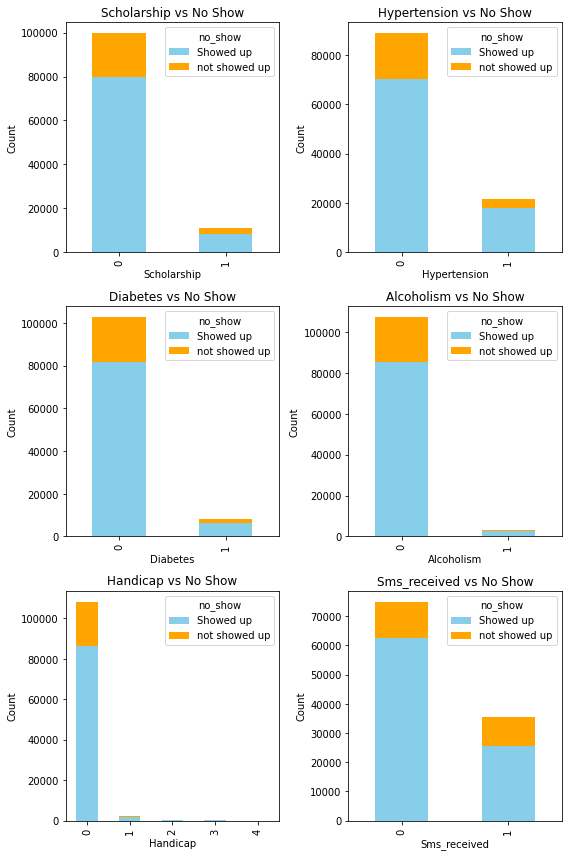

In [31]:
column_plot = ['scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received']

fig = plt.figure(figsize= (8,12))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(3,2, number+1)
    axes.set_title(column.capitalize() + ' vs No Show')
    pd.crosstab(index = show[column], columns = show['no_show']).plot(kind = 'bar',
                                                                           stacked = True, 
                                                                           ax = axes, 
                                                                          color = ['skyblue','orange'])
    axes.set_xlabel(column.capitalize())
    plt.ylabel('Count')
    
plt.tight_layout()

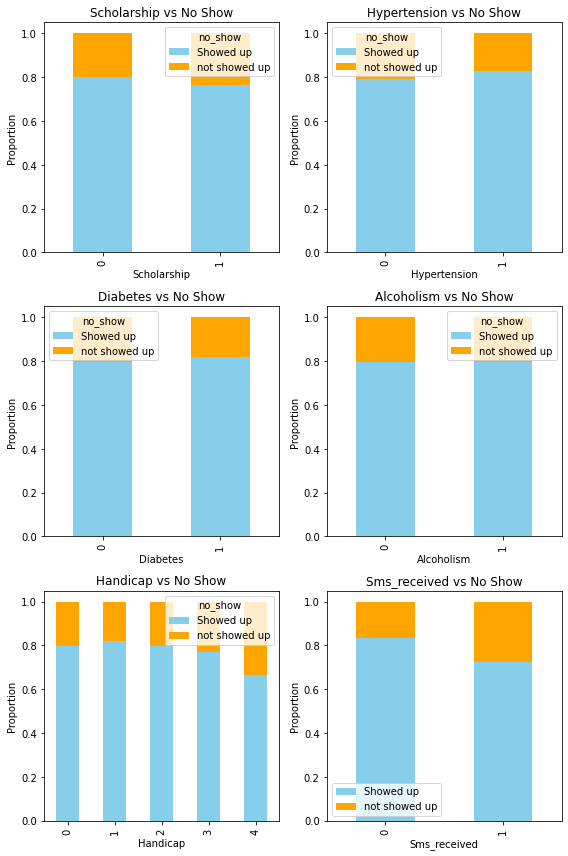

In [33]:
column_plot = ['scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received']

fig = plt.figure(figsize= (8,12))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(3,2, number+1)
    axes.set_title(column.capitalize() + ' vs No Show')
    pd.crosstab(index = show[column], columns = show['no_show'],normalize = 'index').plot(kind = 'bar',
                                                                           stacked = True, 
                                                                           ax = axes, 
                                                                          color = ['skyblue','orange'])
    
    axes.set_xlabel(column.capitalize())
    plt.ylabel('Proportion')
plt.tight_layout() 
plt.legend(loc = 3);

chance of being showed up is higher for those
who
have no schorlarship
have hypertension
have diabetes
and did not received sms

 Which neighbourhood regions are actually have higher appointments with physicians?

In [37]:
neighbor = pd.crosstab(index=show["neighborhood"], 
            columns=show["no_show"])
neighbor_sort = neighbor.sort_values('Showed up', ascending= False)

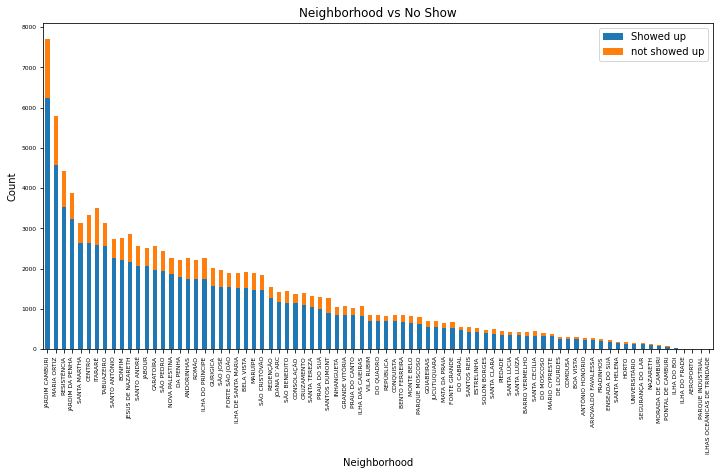

In [39]:
neighbor_sort.plot(kind='bar',figsize = (12,6), fontsize = 6,
                                     stacked = True)

plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Neighborhood vs No Show')

plt.legend();

JARDIM DA PENHA

What factors are important for us to know in order to predict if a patient will show up for their scheduled time?